In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

## NOTE: Do not download the full zip from the link! We provide a special version of this file that has some extra feature engineering for you to do. You won't be able to follow along with the original file!

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

In [2]:
df = pd.read_csv('TensorFlow_FILES/DATA/lending_club_info.csv')
df

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when ap...
7,emp_length,Employment length in years. Possible values ar...
8,home_ownership,The home ownership status provided by the borr...
9,annual_inc,The self-reported annual income provided by th...


In [3]:
df['Description'][0]

'The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.'

In [4]:
## Loading in the dataset
df_loan = pd.read_csv('TensorFlow_FILES/DATA/lending_club_loan_two.csv')

df_loan

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


In [5]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [6]:
#Checking for missing values / o values as we will need to impute the data
df_loan.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

# Section 1: Exploratory Data Analysis

### Gain an understanding for which variables are important

In [7]:
df_loan.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


<Axes: xlabel='loan_amnt', ylabel='Count'>

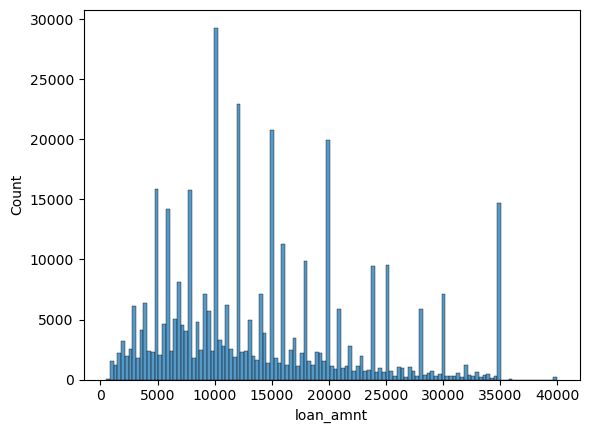

In [8]:
sns.histplot(df_loan['loan_amnt'])

<Axes: >

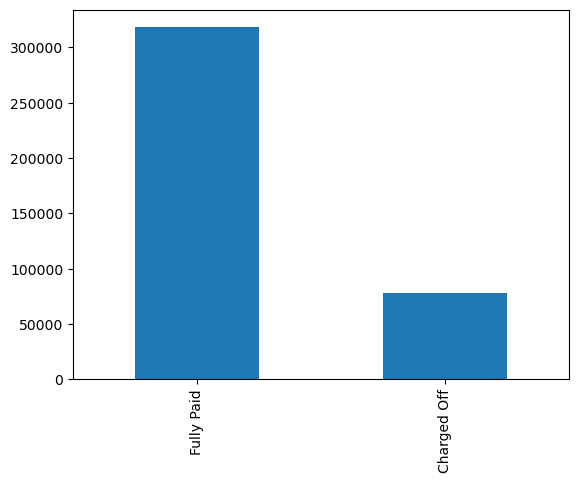

In [9]:
df_loan['loan_status'].value_counts().plot(kind='bar')
# Charged off we can assume as not paid = 0, fully paid = 1

In [10]:
# Do some correlations to see if any variables are closely correlated with each other
df_corr = df_loan.corr().sort_values(by='loan_amnt',ascending=False)

C:\Users\andre\AppData\Local\Temp\ipykernel_19432\2326472365.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df_loan.corr().sort_values(by='loan_amnt',ascending=False)


<Axes: >

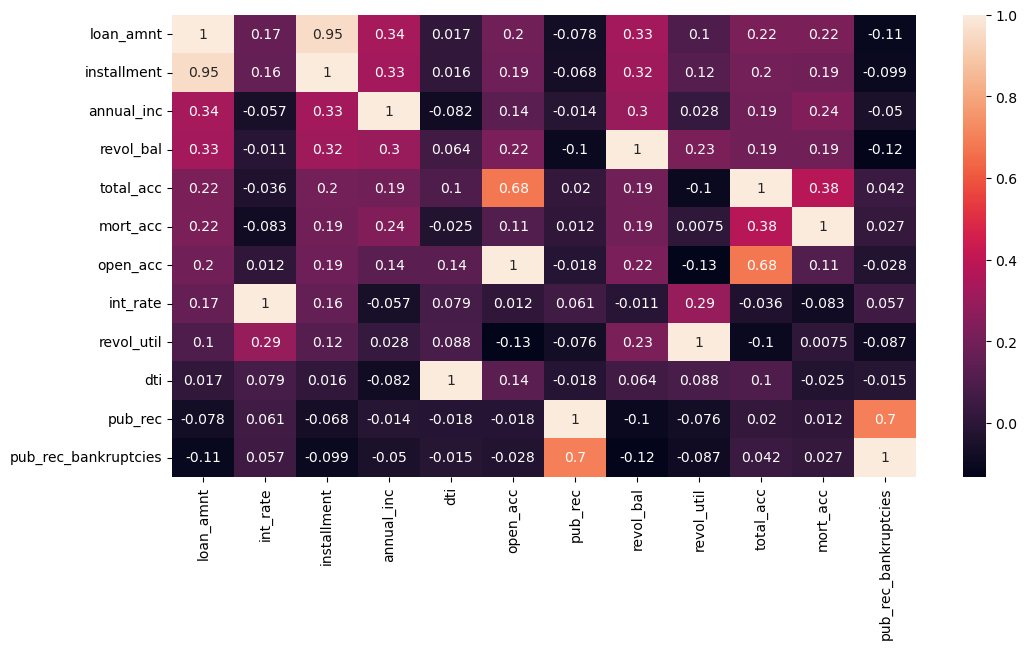

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(df_corr,annot=True)

<Axes: xlabel='loan_amnt', ylabel='installment'>

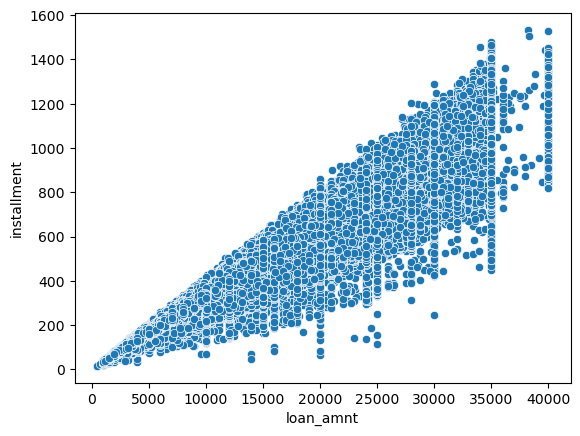

In [12]:
#As installment has a 95% correlation. let's investigate further.
sns.scatterplot(data=df_loan,x='loan_amnt',y='installment')

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

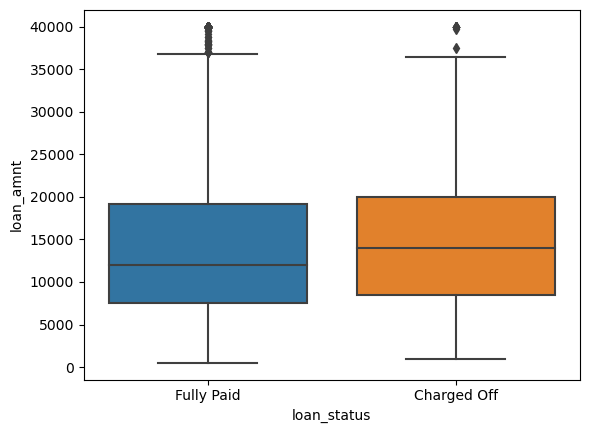

In [13]:
#Investigate the loan statuses vs. loan amount
filtered_loan_df = df_loan[df_loan['loan_status'].isin(['Fully Paid','Charged Off'])]


sns.boxplot(x='loan_status',y='loan_amnt',data=filtered_loan_df)

In [14]:
#Group by a categorical figure 
df_loan.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [15]:
#What are the unique Grade and SubGrade columns that LendingClub attributes to the loans?
loan_grade = df_loan['grade'].sort_values().unique()
loan_grade

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [16]:
loan_subgrade = df_loan['sub_grade'].sort_values().unique()
loan_subgrade

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

<Axes: xlabel='grade', ylabel='count'>

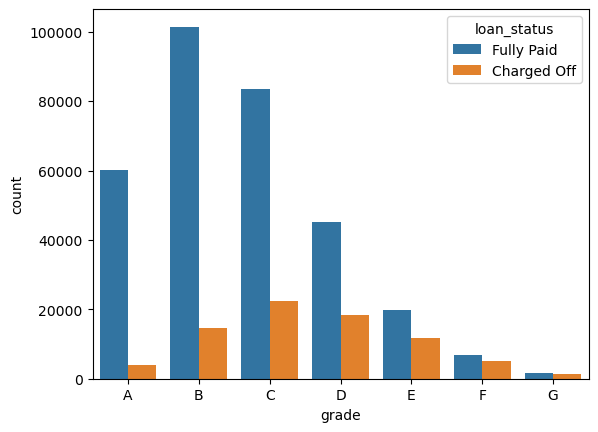

In [17]:
#Create a countplot per grade
sns.countplot(data=df_loan,x='grade',hue='loan_status',order=loan_grade)

<Axes: xlabel='sub_grade', ylabel='count'>

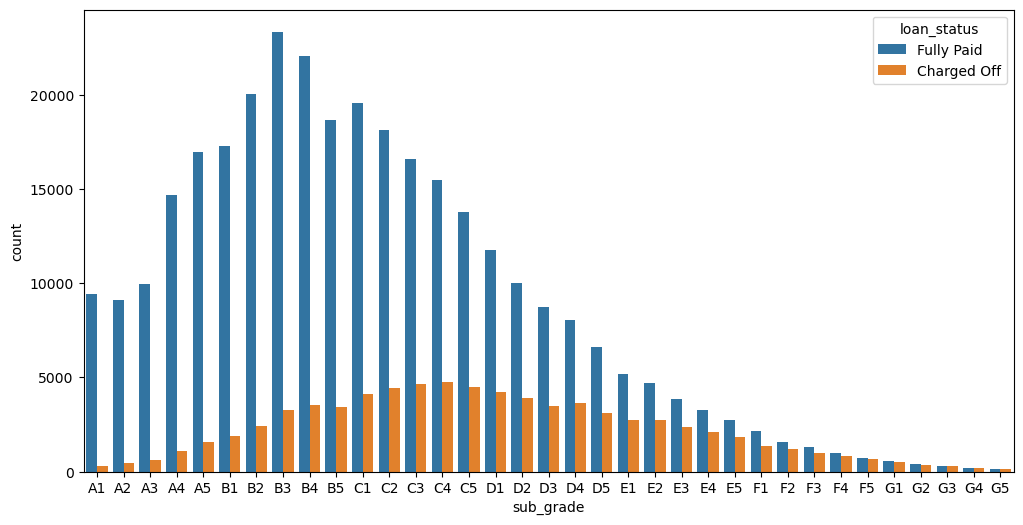

In [18]:
#Create a countplot per grade

plt.figure(figsize=(12,6))
sns.countplot(data=df_loan,x='sub_grade',hue='loan_status',order=loan_subgrade)

In [19]:
#F and G don't look like they get paid back very often. Investigate further by isolating the values
df_FG = df_loan[df_loan['sub_grade'].str.startswith(('F', 'G'))]
df_FG

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
66,15975.0,60 months,24.99,468.80,F,F4,carrier,5 years,MORTGAGE,47000.00,...,10.0,0.0,2049.0,58.5,23.0,w,INDIVIDUAL,1.0,0.0,"59681 Christopher Lock\nNorth Williamtown, UT ..."
87,30000.0,60 months,24.70,875.28,G,G1,Medtronic,5 years,MORTGAGE,187321.00,...,21.0,0.0,54810.0,93.4,52.0,f,INDIVIDUAL,3.0,0.0,"25281 Kevin Neck\nArmstrongton, TN 29597"
96,12625.0,60 months,25.78,376.36,F,F5,Nursing Assistant,7 years,MORTGAGE,43000.00,...,18.0,0.0,19993.0,55.7,31.0,w,INDIVIDUAL,1.0,0.0,"522 Melissa Village\nEast Janice, MT 00813"
97,13400.0,60 months,25.83,399.86,G,G2,DESIGNER,10+ years,MORTGAGE,56000.00,...,23.0,0.0,28845.0,84.5,44.0,w,INDIVIDUAL,6.0,0.0,"0326 Jacob Via\nJacksonstad, MI 93700"
123,30000.0,60 months,23.83,860.09,F,F5,Victorian Senior Care,10+ years,MORTGAGE,72500.00,...,7.0,0.0,6875.0,94.2,32.0,f,INDIVIDUAL,4.0,0.0,"8219 Dennis Station Apt. 722\nBateston, LA 70466"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395875,10000.0,60 months,24.50,290.59,F,F3,soldier,10+ years,RENT,54000.00,...,10.0,0.0,23783.0,91.1,26.0,w,INDIVIDUAL,2.0,0.0,"PSC 1848, Box 3238\nAPO AA 29597"
395908,4075.0,36 months,24.99,162.00,F,F4,NaN,NaN,RENT,13000.00,...,7.0,0.0,4224.0,49.7,13.0,w,INDIVIDUAL,0.0,0.0,"57621 Benjamin Greens Apt. 527\nSouth Richard,..."
395957,14525.0,60 months,21.99,401.09,F,F1,AUDITOR,5 years,RENT,55000.00,...,7.0,1.0,5304.0,67.1,28.0,w,INDIVIDUAL,2.0,1.0,639 Gillespie Forge Apt. 571\nEast Robertmouth...
395976,16475.0,60 months,25.83,491.62,G,G2,assembly technician,7 years,OWN,55000.00,...,17.0,0.0,15548.0,41.2,55.0,f,INDIVIDUAL,0.0,0.0,"0288 Joseph Lakes Suite 493\nLarsonfurt, ID 70466"


In [20]:
order_FG_subgrade = df_FG['sub_grade'].sort_values().unique()
order_FG_subgrade

array(['F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype=object)

<Axes: xlabel='sub_grade', ylabel='count'>

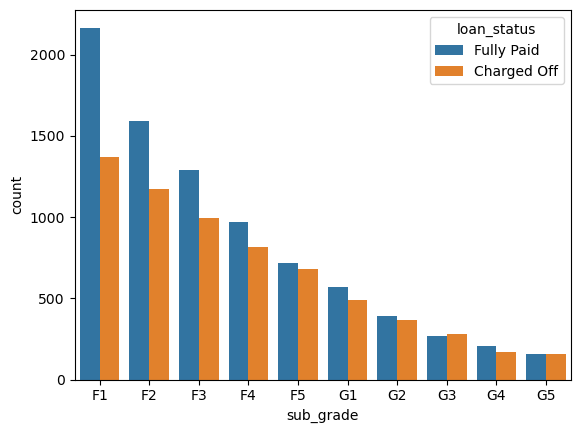

In [21]:
#Create a countplot per grade
sns.countplot(data=df_FG,x='sub_grade',hue='loan_status',order=order_FG_subgrade)

In [22]:
#create 1 or 0 for binary classification
map = {'Fully Paid':1,'Charged Off':0}
df_loan['loan_repaid'] = df_loan['loan_status'].map(map)
df_loan

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723",1
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA...",1
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466",1
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2...",1


C:\Users\andre\AppData\Local\Temp\ipykernel_19432\3839534579.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_loan.corr().sort_values(by='loan_repaid')['loan_repaid'].iloc[0:11].plot(kind='bar')


<Axes: >

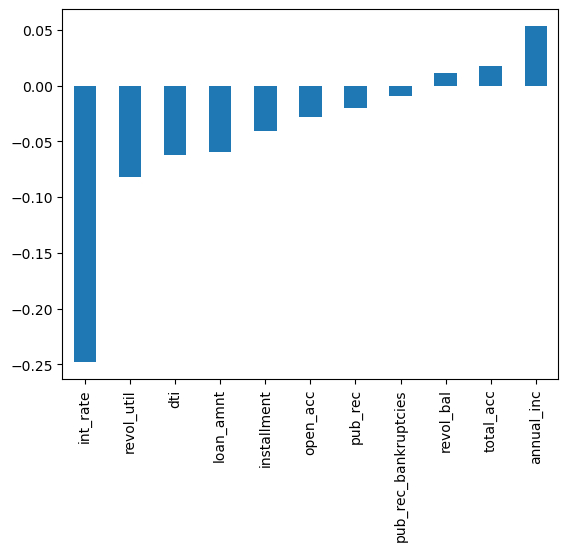

In [23]:
#create a barplot showing the correlation of the numeric features to the new loan_repaid column
df_loan.corr().sort_values(by='loan_repaid')['loan_repaid'].iloc[0:11].plot(kind='bar')


# Section 2: Data PreProcessing

**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**


In [24]:
df_loan.shape

(396030, 28)

In [25]:
#Method one to get % of missing values per row
for i in df_loan.isna().sum():
    percent_df = (i/len(df_loan)) * 100
    print(percent_df)


0.0
0.0
0.0
0.0
0.0
0.0
5.7892078882912905
4.621114562028129
0.0
0.0
0.0
0.0
0.0
0.0
0.44314824634497385
0.0
0.0
0.0
0.0
0.0
0.06969169002348306
0.0
0.0
0.0
9.543468929121532
0.13509077595131683
0.0
0.0


In [26]:
#Method 2 to get missing % of values per row (this is probably better)
df_loan.isna().sum().apply(lambda x:x/len(df_loan) * 100)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [27]:
#Evaluate emp_length and emp_title
df_loan['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [28]:
order_map = ['< 1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']

#df_loan['emp_length'].value_counts().plot(kind='bar')

<Axes: xlabel='emp_length', ylabel='count'>

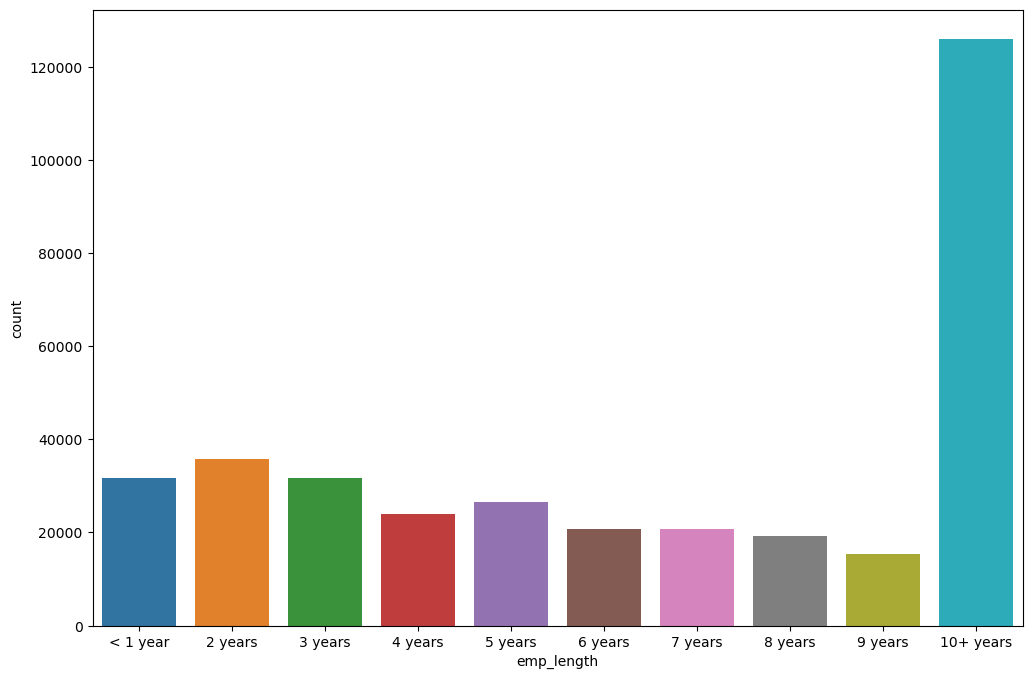

In [29]:
plt.figure(figsize=(12,8))
sns.countplot(data=df_loan,x='emp_length',order=order_map)

<Axes: xlabel='emp_length', ylabel='count'>

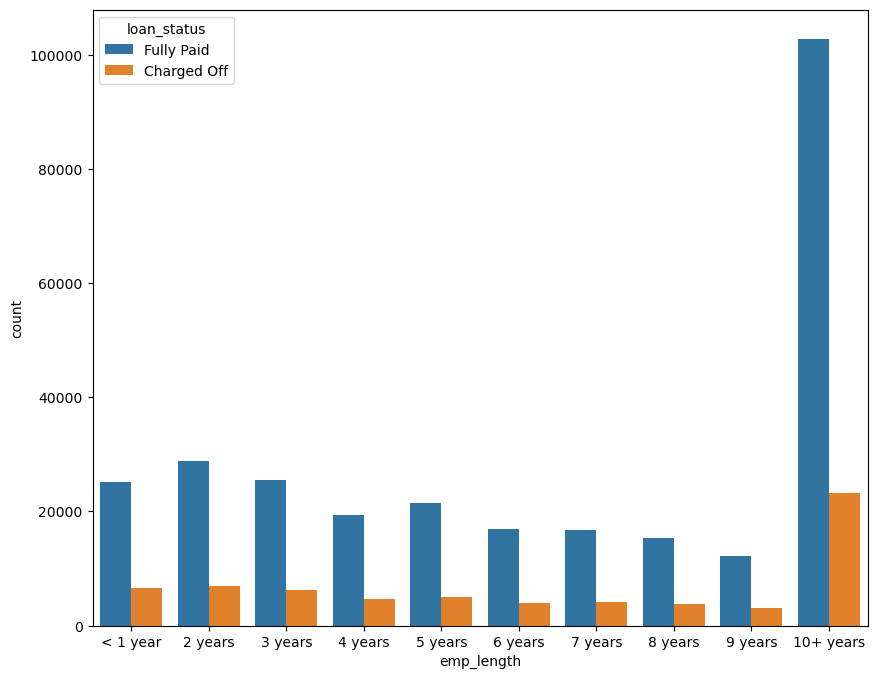

In [30]:
# Add a hue separating Fully Paid vs. Charged Off
plt.figure(figsize=(10,8))
sns.countplot(data=df_loan,x='emp_length',order=order_map,hue='loan_status')

In [31]:
df_charged = df_loan[df_loan['loan_status'] == 'Charged Off']
series1 = df_charged['emp_length'].value_counts()
series1

10+ years    23215
2 years       6924
< 1 year      6563
3 years       6182
1 year        5154
5 years       5092
4 years       4608
7 years       4055
6 years       3943
8 years       3829
9 years       3070
Name: emp_length, dtype: int64

In [32]:
df_paid = df_loan[df_loan['loan_status'] == 'Fully Paid']
series2 = df_paid['emp_length'].value_counts()
series2

10+ years    102826
2 years       28903
3 years       25483
< 1 year      25162
5 years       21403
1 year        20728
4 years       19344
6 years       16898
7 years       16764
8 years       15339
9 years       12244
Name: emp_length, dtype: int64

In [33]:
series3 = (series1/series2) *100
series3

1 year       24.864917
10+ years    22.576975
2 years      23.955991
3 years      24.259310
4 years      23.821340
5 years      23.791057
6 years      23.334122
7 years      24.188738
8 years      24.962514
9 years      25.073505
< 1 year     26.082982
Name: emp_length, dtype: float64

<Axes: >

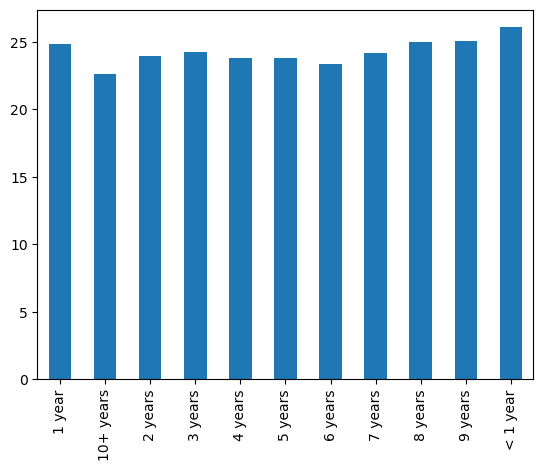

In [34]:
series3.plot(kind='bar')

In [35]:
df_loan = df_loan.drop(columns=['emp_length']) # as values are similar across the board
df_loan

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,RENT,117000.0,Not Verified,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,MORTGAGE,65000.0,Not Verified,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,RENT,43057.0,Source Verified,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,RENT,54000.0,Not Verified,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,MORTGAGE,55000.0,Verified,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,RENT,40000.0,Source Verified,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723",1
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,MORTGAGE,110000.0,Source Verified,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA...",1
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,RENT,56500.0,Verified,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466",1
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",MORTGAGE,64000.0,Verified,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2...",1


In [36]:
df_loan.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [37]:
df_loan['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [38]:
df_loan['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [39]:
df_loan = df_loan.drop(columns=['title'])
df_loan

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,RENT,117000.0,Not Verified,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,MORTGAGE,65000.0,Not Verified,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,RENT,43057.0,Source Verified,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,RENT,54000.0,Not Verified,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,MORTGAGE,55000.0,Verified,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,RENT,40000.0,Source Verified,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723",1
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,MORTGAGE,110000.0,Source Verified,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA...",1
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,RENT,56500.0,Verified,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466",1
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",MORTGAGE,64000.0,Verified,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2...",1


In [40]:
df_loan['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [41]:
df_loan.corr()['mort_acc']

C:\Users\andre\AppData\Local\Temp\ipykernel_19432\103467542.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_loan.corr()['mort_acc']


loan_amnt               0.222315
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
Name: mort_acc, dtype: float64

In [42]:
total_acc_avg = df_loan.groupby(by='total_acc')['mort_acc'].mean()
total_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [43]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [44]:
df_loan['mort_acc'] = df_loan.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)
df_loan

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,RENT,117000.0,Not Verified,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.000000,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,MORTGAGE,65000.0,Not Verified,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.000000,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,RENT,43057.0,Source Verified,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.000000,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,RENT,54000.0,Not Verified,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.000000,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,MORTGAGE,55000.0,Verified,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.000000,0.0,"679 Luna Roads\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,RENT,40000.0,Source Verified,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.000000,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723",1
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,MORTGAGE,110000.0,Source Verified,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.000000,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA...",1
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,RENT,56500.0,Verified,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.000000,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466",1
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",MORTGAGE,64000.0,Verified,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.000000,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2...",1


In [45]:
df_loan.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                    0
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [46]:
df_loan = df_loan.drop(columns=['emp_title'])
df_loan.isna().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [47]:
df_loan = df_loan.dropna()
df_loan.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables


In [48]:
df_loan.select_dtypes(include='object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [49]:
term_map = {' 36 months': '36', ' 60 months': '60'}
df_loan['term'] = df_loan['term'].map(term_map)
df_loan['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: object

In [50]:
df_loan

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.000000,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.000000,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.000000,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.000000,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.000000,0.0,"679 Luna Roads\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B,B4,RENT,40000.0,Source Verified,Oct-2015,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.000000,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723",1
396026,21000.0,36,12.29,700.42,C,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.000000,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA...",1
396027,5000.0,36,9.99,161.32,B,B1,RENT,56500.0,Verified,Oct-2013,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.000000,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466",1
396028,21000.0,60,15.31,503.02,C,C2,MORTGAGE,64000.0,Verified,Aug-2012,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.000000,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2...",1


In [51]:
df_loan = df_loan.drop(columns='grade')
df_loan

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.000000,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.000000,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.000000,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.000000,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.000000,0.0,"679 Luna Roads\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B4,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.000000,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723",1
396026,21000.0,36,12.29,700.42,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.000000,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA...",1
396027,5000.0,36,9.99,161.32,B1,RENT,56500.0,Verified,Oct-2013,Fully Paid,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.000000,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466",1
396028,21000.0,60,15.31,503.02,C2,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.000000,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2...",1


In [52]:
df_loan['sub_grade']

0         B4
1         B5
2         B3
3         A2
4         C5
          ..
396025    B4
396026    C1
396027    B1
396028    C2
396029    C2
Name: sub_grade, Length: 395219, dtype: object

In [53]:
dummy_Df = pd.get_dummies(df_loan['sub_grade'],drop_first=True)
dummy_Df

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
396026,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
396027,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df_loan = pd.concat([df_loan,dummy_Df],axis=1,join='outer')
df_loan

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B4,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
396026,21000.0,36,12.29,700.42,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,B1,RENT,56500.0,Verified,Oct-2013,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
396028,21000.0,60,15.31,503.02,C2,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,...,0,0,0,0,0,0,0,0,0,0


In [55]:
dummy_Df_ver = pd.get_dummies(df_loan['verification_status'],drop_first=True)
dummy_Df_ver
dummy_Df_app = pd.get_dummies(df_loan['application_type'],drop_first=True)
dummy_Df_app
dummy_Df_status = pd.get_dummies(df_loan['initial_list_status'],drop_first=True)
dummy_Df_status
dummy_Df_purpose = pd.get_dummies(df_loan['purpose'],drop_first=True)
dummy_Df_purpose
df_loan = pd.concat([df_loan,dummy_Df_ver,dummy_Df_app,dummy_Df_status,dummy_Df_purpose],axis=1,join='outer')
df_loan

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B4,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
396026,21000.0,36,12.29,700.42,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,B1,RENT,56500.0,Verified,Oct-2013,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
396028,21000.0,60,15.31,503.02,C2,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df_loan['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [57]:
df_loan['home_ownership'] = df_loan['home_ownership'].replace({'NONE':'OTHER','ANY':'OTHER'})
df_dummy_ownership = pd.get_dummies(df_loan['home_ownership'],drop_first=True)
df_loan = pd.concat([df_loan,df_dummy_ownership],axis=1,join='outer')
df_loan

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,medical,moving,other,renewable_energy,small_business,vacation,wedding,OTHER,OWN,RENT
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,...,0,0,0,0,0,1,0,0,0,1
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,1
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,...,0,0,0,0,0,0,0,0,0,1
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B4,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,1
396026,21000.0,36,12.29,700.42,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,B1,RENT,56500.0,Verified,Oct-2013,Fully Paid,...,0,0,0,0,0,0,0,0,0,1
396028,21000.0,60,15.31,503.02,C2,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df_loan

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,medical,moving,other,renewable_energy,small_business,vacation,wedding,OTHER,OWN,RENT
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,...,0,0,0,0,0,1,0,0,0,1
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,1
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,...,0,0,0,0,0,0,0,0,0,1
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B4,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,1
396026,21000.0,36,12.29,700.42,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,B1,RENT,56500.0,Verified,Oct-2013,Fully Paid,...,0,0,0,0,0,0,0,0,0,1
396028,21000.0,60,15.31,503.02,C2,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df_loan['zip_code'] = df_loan['address'].str.split(' ').str.get(-1)
df_loan

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,moving,other,renewable_energy,small_business,vacation,wedding,OTHER,OWN,RENT,zip_code
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,...,0,0,0,0,1,0,0,0,1,22690
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,05113
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,...,0,0,0,0,0,0,0,0,1,05113
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,...,0,0,0,0,0,0,0,0,1,00813
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,...,0,0,0,0,0,0,0,0,0,11650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B4,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,...,0,0,0,0,0,0,0,0,1,30723
396026,21000.0,36,12.29,700.42,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,05113
396027,5000.0,36,9.99,161.32,B1,RENT,56500.0,Verified,Oct-2013,Fully Paid,...,0,0,0,0,0,0,0,0,1,70466
396028,21000.0,60,15.31,503.02,C2,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,...,0,0,0,0,0,0,0,0,0,29597


In [60]:
dummy_zip = pd.get_dummies(df_loan['zip_code'],drop_first=True)
df_loan = pd.concat([df_loan,dummy_zip],axis=1,join='outer')
df_loan = df_loan.drop(columns='zip_code')
df_loan

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,...,1,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,...,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B4,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,...,1,0,0,0,0,1,0,0,0,0
396026,21000.0,36,12.29,700.42,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,...,0,1,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,B1,RENT,56500.0,Verified,Oct-2013,Fully Paid,...,1,0,0,0,0,0,0,1,0,0
396028,21000.0,60,15.31,503.02,C2,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,...,0,0,0,0,1,0,0,0,0,0


In [61]:
df_loan.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified', 'Verified',
       'INDIVIDUAL', 'JOINT', 'w', 'credit_card', 'debt_consolidation',
       'educational', 'home_improvement', 'house', 'major_purchase', 'medical',
       'moving', 'other', 'renewable_energy', 'small_business', 'vacation',
       'wedding', 'OTHER', 'OWN', 'RENT', '05113', '11650', '22690', '29597',
       '30723', '48052', '70466', '86630', '9370

In [62]:
df_loan = df_loan.drop(columns='issue_d')
df_loan

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,Fully Paid,vacation,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,Fully Paid,debt_consolidation,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,Fully Paid,credit_card,...,1,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,Fully Paid,credit_card,...,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,Charged Off,credit_card,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B4,RENT,40000.0,Source Verified,Fully Paid,debt_consolidation,...,1,0,0,0,0,1,0,0,0,0
396026,21000.0,36,12.29,700.42,C1,MORTGAGE,110000.0,Source Verified,Fully Paid,debt_consolidation,...,0,1,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,B1,RENT,56500.0,Verified,Fully Paid,debt_consolidation,...,1,0,0,0,0,0,0,1,0,0
396028,21000.0,60,15.31,503.02,C2,MORTGAGE,64000.0,Verified,Fully Paid,debt_consolidation,...,0,0,0,0,1,0,0,0,0,0


In [63]:
df_loan['earliest_cr_year'] = df_loan['earliest_cr_line'].astype('datetime64').dt.year
df_loan.drop(columns='earliest_cr_line')
df_loan

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,Fully Paid,vacation,...,0,0,1,0,0,0,0,0,0,1990
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,Fully Paid,debt_consolidation,...,1,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,Fully Paid,credit_card,...,1,0,0,0,0,0,0,0,0,2007
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,2006
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,Charged Off,credit_card,...,0,1,0,0,0,0,0,0,0,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B4,RENT,40000.0,Source Verified,Fully Paid,debt_consolidation,...,0,0,0,0,1,0,0,0,0,2004
396026,21000.0,36,12.29,700.42,C1,MORTGAGE,110000.0,Source Verified,Fully Paid,debt_consolidation,...,1,0,0,0,0,0,0,0,0,2006
396027,5000.0,36,9.99,161.32,B1,RENT,56500.0,Verified,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,1,0,0,1997
396028,21000.0,60,15.31,503.02,C2,MORTGAGE,64000.0,Verified,Fully Paid,debt_consolidation,...,0,0,0,1,0,0,0,0,0,1990


In [64]:
from sklearn.model_selection import train_test_split

In [65]:
# drop loan_status as it is a duplicate of loan_repaid
df_loan = df_loan.drop(columns='loan_status')
df_loan

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,purpose,dti,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,vacation,26.24,...,0,0,1,0,0,0,0,0,0,1990
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,debt_consolidation,22.05,...,1,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,credit_card,12.79,...,1,0,0,0,0,0,0,0,0,2007
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,credit_card,2.60,...,0,0,0,0,0,0,0,0,0,2006
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,credit_card,33.95,...,0,1,0,0,0,0,0,0,0,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B4,RENT,40000.0,Source Verified,debt_consolidation,15.63,...,0,0,0,0,1,0,0,0,0,2004
396026,21000.0,36,12.29,700.42,C1,MORTGAGE,110000.0,Source Verified,debt_consolidation,21.45,...,1,0,0,0,0,0,0,0,0,2006
396027,5000.0,36,9.99,161.32,B1,RENT,56500.0,Verified,debt_consolidation,17.56,...,0,0,0,0,0,0,1,0,0,1997
396028,21000.0,60,15.31,503.02,C2,MORTGAGE,64000.0,Verified,debt_consolidation,15.88,...,0,0,0,1,0,0,0,0,0,1990


In [66]:
df_loan['loan_repaid']

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_repaid, Length: 395219, dtype: int64

In [67]:
df_loan['C5'] = pd.to_numeric(df_loan['C5'],errors='coerce')

df_loan.dtypes

loan_amnt           float64
term                 object
int_rate            float64
installment         float64
sub_grade            object
                     ...   
48052                 uint8
70466                 uint8
86630                 uint8
93700                 uint8
earliest_cr_year      int64
Length: 87, dtype: object

In [68]:
df_loan.select_dtypes(include='object').columns
df_loan = df_loan.drop(columns=['term','verification_status'])

In [69]:
df_loan = df_loan.drop(columns=['purpose','home_ownership','address','application_type','initial_list_status',
                               'earliest_cr_line','sub_grade'])

**Setting X and y variables to the .values of the features and label.**

In [70]:
X = df_loan.drop(columns='loan_repaid',axis=1).values
y = df_loan['loan_repaid'].values

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalizing the Data

**Use a MinMaxScaler to normalize the feature data X_train and X_test**

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [73]:
X_train = scaler.fit_transform(X_train)

In [74]:
X_test = scaler.transform(X_test)

# Creating the Model


In [75]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

**TASK: Build a sequential model to will be trained on the data. You have unlimited options here, but here is what the solution uses: a model that goes 78 --> 39 --> 19--> 1 output neuron. OPTIONAL: Explore adding [Dropout layers](https://keras.io/layers/core/) [1](https://en.wikipedia.org/wiki/Dropout_(neural_networks)) [2](https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab)**

In [76]:
model = Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(58,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(28,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid')) #1ayer as output

model.compile(optimizer='adam',loss='binary_crossentropy')

In [77]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',mode='min', #wait 25 epochs before stopping due to noise
                          verbose=1,patience=25) #want to minimise loss. loss of 0 = perfect fit

**Fitting the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256.**

In [95]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=256,epochs=250,early_stop=[early_stop])

Epoch 1/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.2568 - val_loss: 0.2610
Epoch 2/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2574 - val_loss: 0.2608
Epoch 3/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.2544 - val_loss: 0.2615
Epoch 4/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2560 - val_loss: 0.2606
Epoch 5/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2551 - val_loss: 0.2607
Epoch 6/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2544 - val_loss: 0.2611
Epoch 7/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2534 - val_loss: 0.2611
Epoch 8/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.2532 - val_loss: 0.2608
Epoch 9/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2554 - val_loss: 0.2613
Epoch 10/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.2557 - val_loss: 0.2605
Epoch 11/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.2534 - val_loss: 0.2605
Epoch 12/25
1236/1236 ━━━━━━━━

In [87]:
#save & load model 
from tensorflow.keras.models import load_model
model.save('KerasAPIProject.keras')

# Section 3: Evaluating Model Performance.

**Plotting out the validation loss versus the training loss.**

In [96]:
losses = pd.DataFrame(model.history.history)

In [97]:
losses

,loss,val_loss
0,0.255956,0.261039
1,0.255582,0.260798
2,0.255470,0.261515
3,0.255234,0.260645
4,0.254942,0.260696
5,0.255068,0.261051
6,0.254770,0.261125
7,0.254952,0.260769
8,0.254860,0.261341
9,0.254348,0.260482


<Axes: >

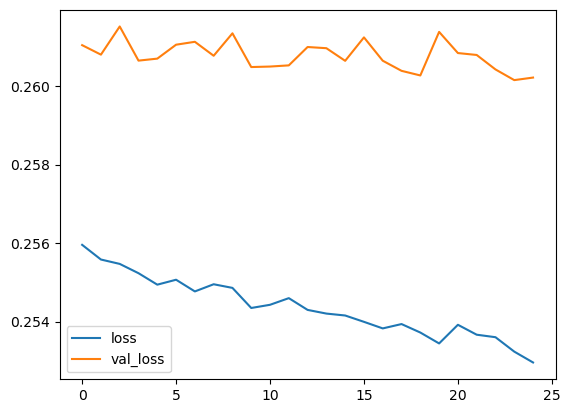

In [102]:
losses.plot()

**Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [103]:
from sklearn.metrics import classification_report,confusion_matrix

In [104]:
#classification task. predicting 0 or 1.
predictions = model.predict(X_test)
predicted_classes = np.where(predictions >= 0.5,1,0)

2471/2471 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [105]:
print(classification_report(y_test,predicted_classes))

              precision    recall  f1-score   support

           0       0.96      0.45      0.62     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [109]:
print(confusion_matrix(y_test,predicted_classes))

[[ 7085  8573]
 [  287 63099]]


**Given the customer below, would you offer this person a loan?**

In [113]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df_loan.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt            34000.00
int_rate                 7.90
installment           1063.87
annual_inc          130580.00
dti                     25.40
                      ...    
48052                    0.00
70466                    1.00
86630                    0.00
93700                    0.00
earliest_cr_year      1990.00
Name: 18, Length: 77, dtype: float64

In [108]:
df_loan.shape

(395219, 78)

In [114]:
#need to scale data 
new_customer = scaler.transform(new_customer.values.reshape(1,77))
new_customer

array([[0.84615385, 0.10050643, 0.6895914 , 0.01499785, 0.00254025,
        0.2       , 0.        , 0.00502907, 0.01333632, 0.22818792,
        0.08823529, 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.  

In [118]:
predictions = model.predict(new_customer)
predicted_classes = np.where(predictions >= 0.5,1,0)
predicted_classes

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


array([[1]])

In [120]:
df_loan.iloc[random_ind]['loan_repaid'] #loan was repaid

1.0

In [121]:
model = Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(58,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(28,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid')) #1ayer as output

model.compile(optimizer='adam',loss='binary_crossentropy')

In [123]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=256,epochs=250,callbacks=[early_stop])

Epoch 1/250
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.3715 - val_loss: 0.2670
Epoch 2/250
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.2701 - val_loss: 0.2652
Epoch 3/250
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2671 - val_loss: 0.2642
Epoch 4/250
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2652 - val_loss: 0.2640
Epoch 5/250
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2634 - val_loss: 0.2628
Epoch 6/250
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2644 - val_loss: 0.2628
Epoch 7/250
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2621 - val_loss: 0.2625
Epoch 8/250
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2615 - val_loss: 0.2628
Epoch 9/250
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.2635 - val_loss: 0.2647
Epoch 10/250
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2616 - val_loss: 0.2632
Epoch 11/250
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2606 - val_loss: 0.2626
Epoch 12/250
1236/1

1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2553 - val_loss: 0.2619
Epoch 68/250
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2539 - val_loss: 0.2620
Epoch 69/250
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2564 - val_loss: 0.2622
Epoch 70/250
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2556 - val_loss: 0.2635
Epoch 71/250
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2568 - val_loss: 0.2618
Epoch 72/250
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2539 - val_loss: 0.2623
Epoch 73/250
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2542 - val_loss: 0.2622
Epoch 74/250
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2555 - val_loss: 0.2629
Epoch 75/250
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2543 - val_loss: 0.2624
Epoch 76/250
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2549 - val_loss: 0.2618
Epoch 76: early stopping


In [124]:
losses = pd.DataFrame(model.history.history)

In [125]:
losses

,loss,val_loss
0,0.309523,0.267019
1,0.268401,0.265222
2,0.266034,0.264169
3,0.264508,0.263978
4,0.263817,0.262820
...,...,...
71,0.255093,0.262255
72,0.255332,0.262243
73,0.255257,0.262866
74,0.255344,0.262385


<Axes: >

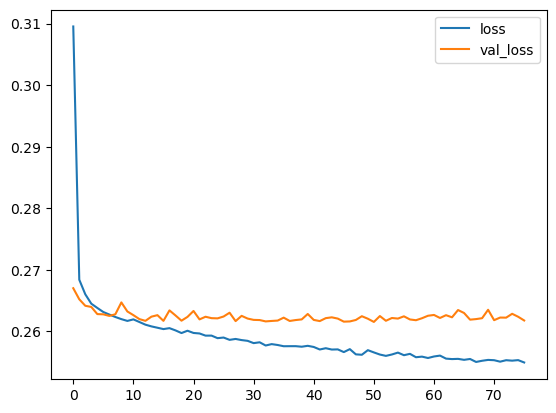

In [126]:
losses.plot()

In [127]:
#classification task. predicting 0 or 1.
predictions1 = model.predict(X_test)
predicted_classes1 = np.where(predictions1 >= 0.5,1,0)
print(classification_report(y_test,predicted_classes1))

2471/2471 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [128]:
print(confusion_matrix(y_test,predicted_classes1))

[[ 6749  8909]
 [   20 63366]]
